In [2]:
library('readr')
library('magrittr')
library('dplyr')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [13]:
donor_counts <-
    read_tsv(
        'counts.tsv',
        col_types=cols(
            `Donor`=col_factor(levels=c("D3", "D4", "D7", "D8", "D9", "D14", "D15", "D16", "D17", "D20", "D21")),
            .default=col_double()
        )
    )

donor_counts

Donor,PBMC count,T cell count,T cell / PBMC
D3,1.35e+09,2.5e+08,18.52
D4,3.50e+08,1.2e+08,34.29
D7,7.50e+08,2.4e+08,32.00
D8,6.40e+08,5.7e+08,89.06
D9,6.00e+08,4.8e+08,80.00
D14,1.00e+09,2.0e+08,20.00
D15,7.60e+08,3.6e+08,47.37
D16,5.40e+08,2.0e+08,37.04
D17,6.70e+08,3.4e+08,50.75
D20,8.80e+08,2.7e+08,30.68


In [14]:
summary(donor_counts)

     Donor     PBMC count         T cell count       T cell / PBMC  
 D3     :1   Min.   :3.500e+08   Min.   :120000000   Min.   :18.52  
 D4     :1   1st Qu.:6.200e+08   1st Qu.:220000000   1st Qu.:31.34  
 D7     :1   Median :7.500e+08   Median :270000000   Median :37.04  
 D8     :1   Mean   :7.764e+08   Mean   :312727273   Mean   :43.70  
 D9     :1   3rd Qu.:9.400e+08   3rd Qu.:385000000   3rd Qu.:49.06  
 D14    :1   Max.   :1.350e+09   Max.   :570000000   Max.   :89.06  
 (Other):5                                                          

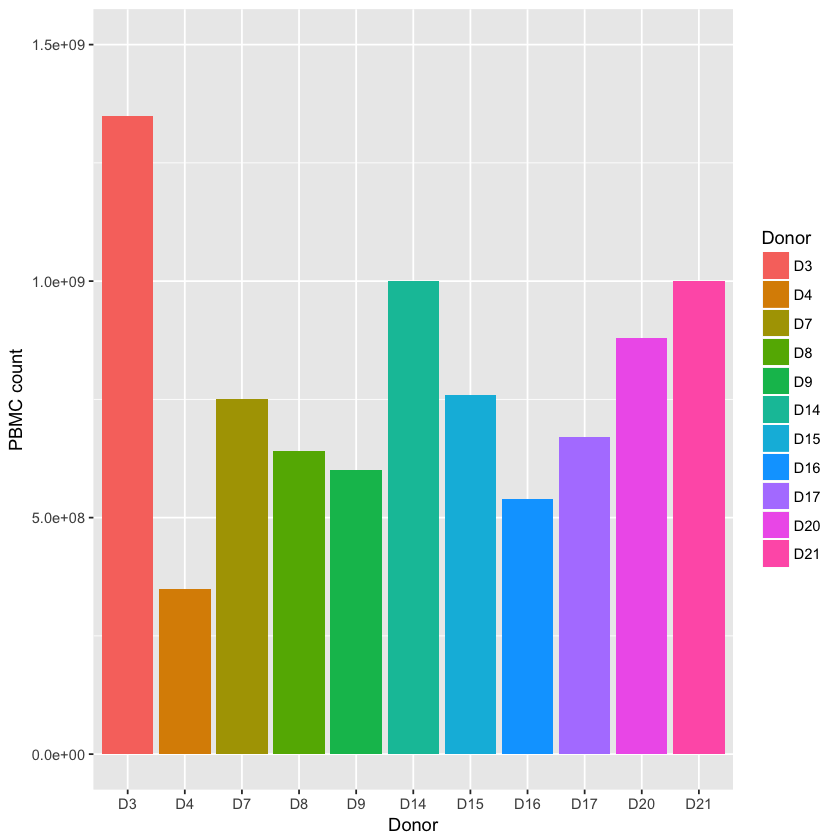

In [5]:
donor_counts %>%
    ggplot(aes(x=`Donor`, y=`PBMC count`, fill=`Donor`)) +
    geom_col() +
    ylim(0, 1.5e9)

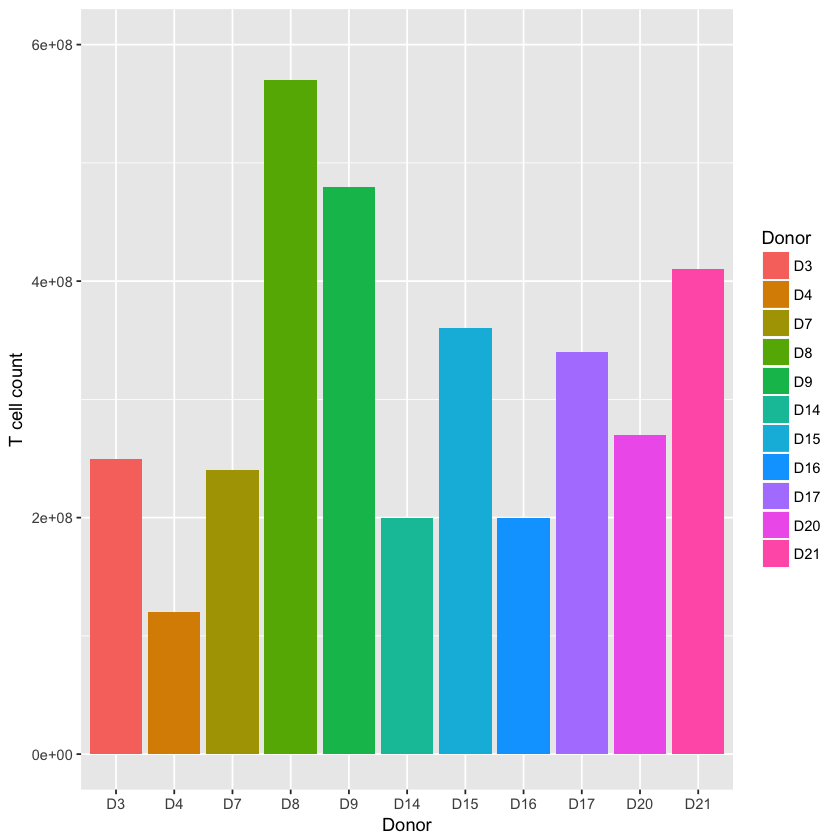

In [6]:
donor_counts %>%
    ggplot(aes(x=`Donor`, y=`T cell count`, fill=`Donor`)) +
    geom_col() +
    ylim(0, 6e8)

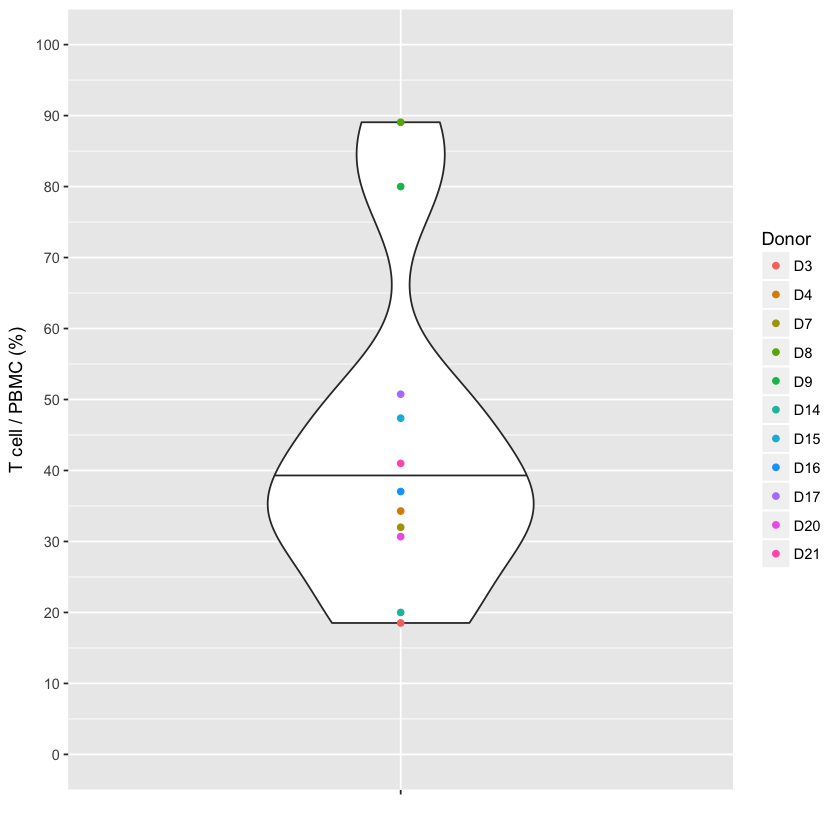

In [37]:
donor_counts %>%
    mutate(`T cell / PBMC`=`T cell count`/`PBMC count`*100) %>%
    ggplot(aes(y=`T cell / PBMC`, x="")) + 
        geom_violin(draw_quantiles = c(0.5), width=.4) +
        geom_point(aes(color=`Donor`)) +
        scale_y_continuous(
            breaks=seq(0, 100, 10),
            lim=c(0, 100)
        ) +
        ylab('T cell / PBMC (%)') +
        xlab('')
